In [3]:
# 구글드라이버 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/DataScientist

/content/drive/MyDrive/DataScientist


In [6]:
#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#데이터 라이브러리
import numpy as np
import pandas as pd

# 데이터 로딩

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('train_label.csv')

# 데이터 구조 확인

In [ ]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## 결측치 확인

In [ ]:
df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 

In [ ]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Label 분포 확인

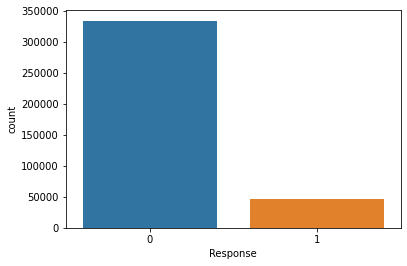

In [ ]:
sns.countplot(x = df_train['Response'])
plt.show()

In [9]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Label의 데이터 분포가 0이 약 7배가 많다.
학습시 비율 조정이 필요하다.
0인 데이터를 샘플링해서 비율을 맞춰준다

# Category 데이터

In [ ]:
df_train.describe(include=['O'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Categorycal 데이터 3 컬럼에 대해서 수치화 한다. 필요시 가변수화도 진행한다.

## Category 데이터 변환

In [12]:
# change categorical column to numeric
# pd.Series(np.where(df_train.Gender.values == 'Male', 1, 0), df_train.index)
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

'id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'

# 히트맵 분석

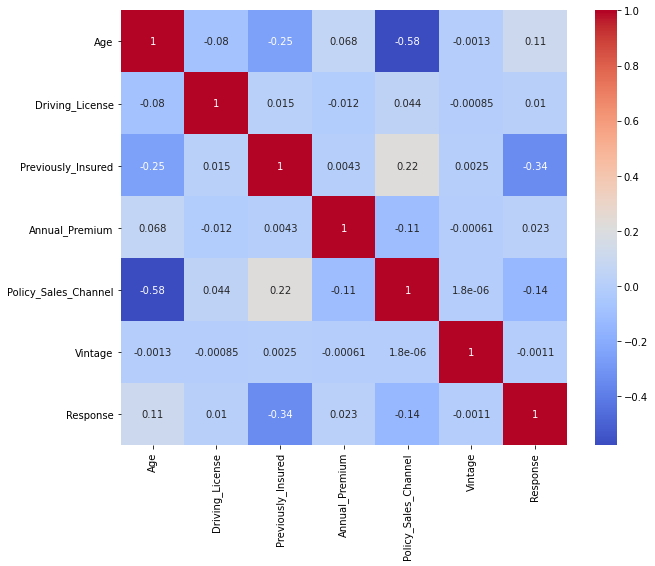

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.drop('id',axis=1).drop('Region_Code', axis=1).drop('Gender',axis=1).drop('Vehicle_Age',axis=1).drop('Vehicle_Damage',axis=1).corr(),cmap='coolwarm', annot=True)

히트맵은 상관계수를 기반으로 선형적관계에 대한 해석이므로 구성시 수치화된 카테고리컬 컬럼은 제외한다.
위 히트맵으로 Response와 상관이 큰 컬럼순서는
Previously_Insured, Policy_Sales_Channel, Age, Annual_Premium, Driving_License 순으로 볼 수 있다.

# Pairplot 분석

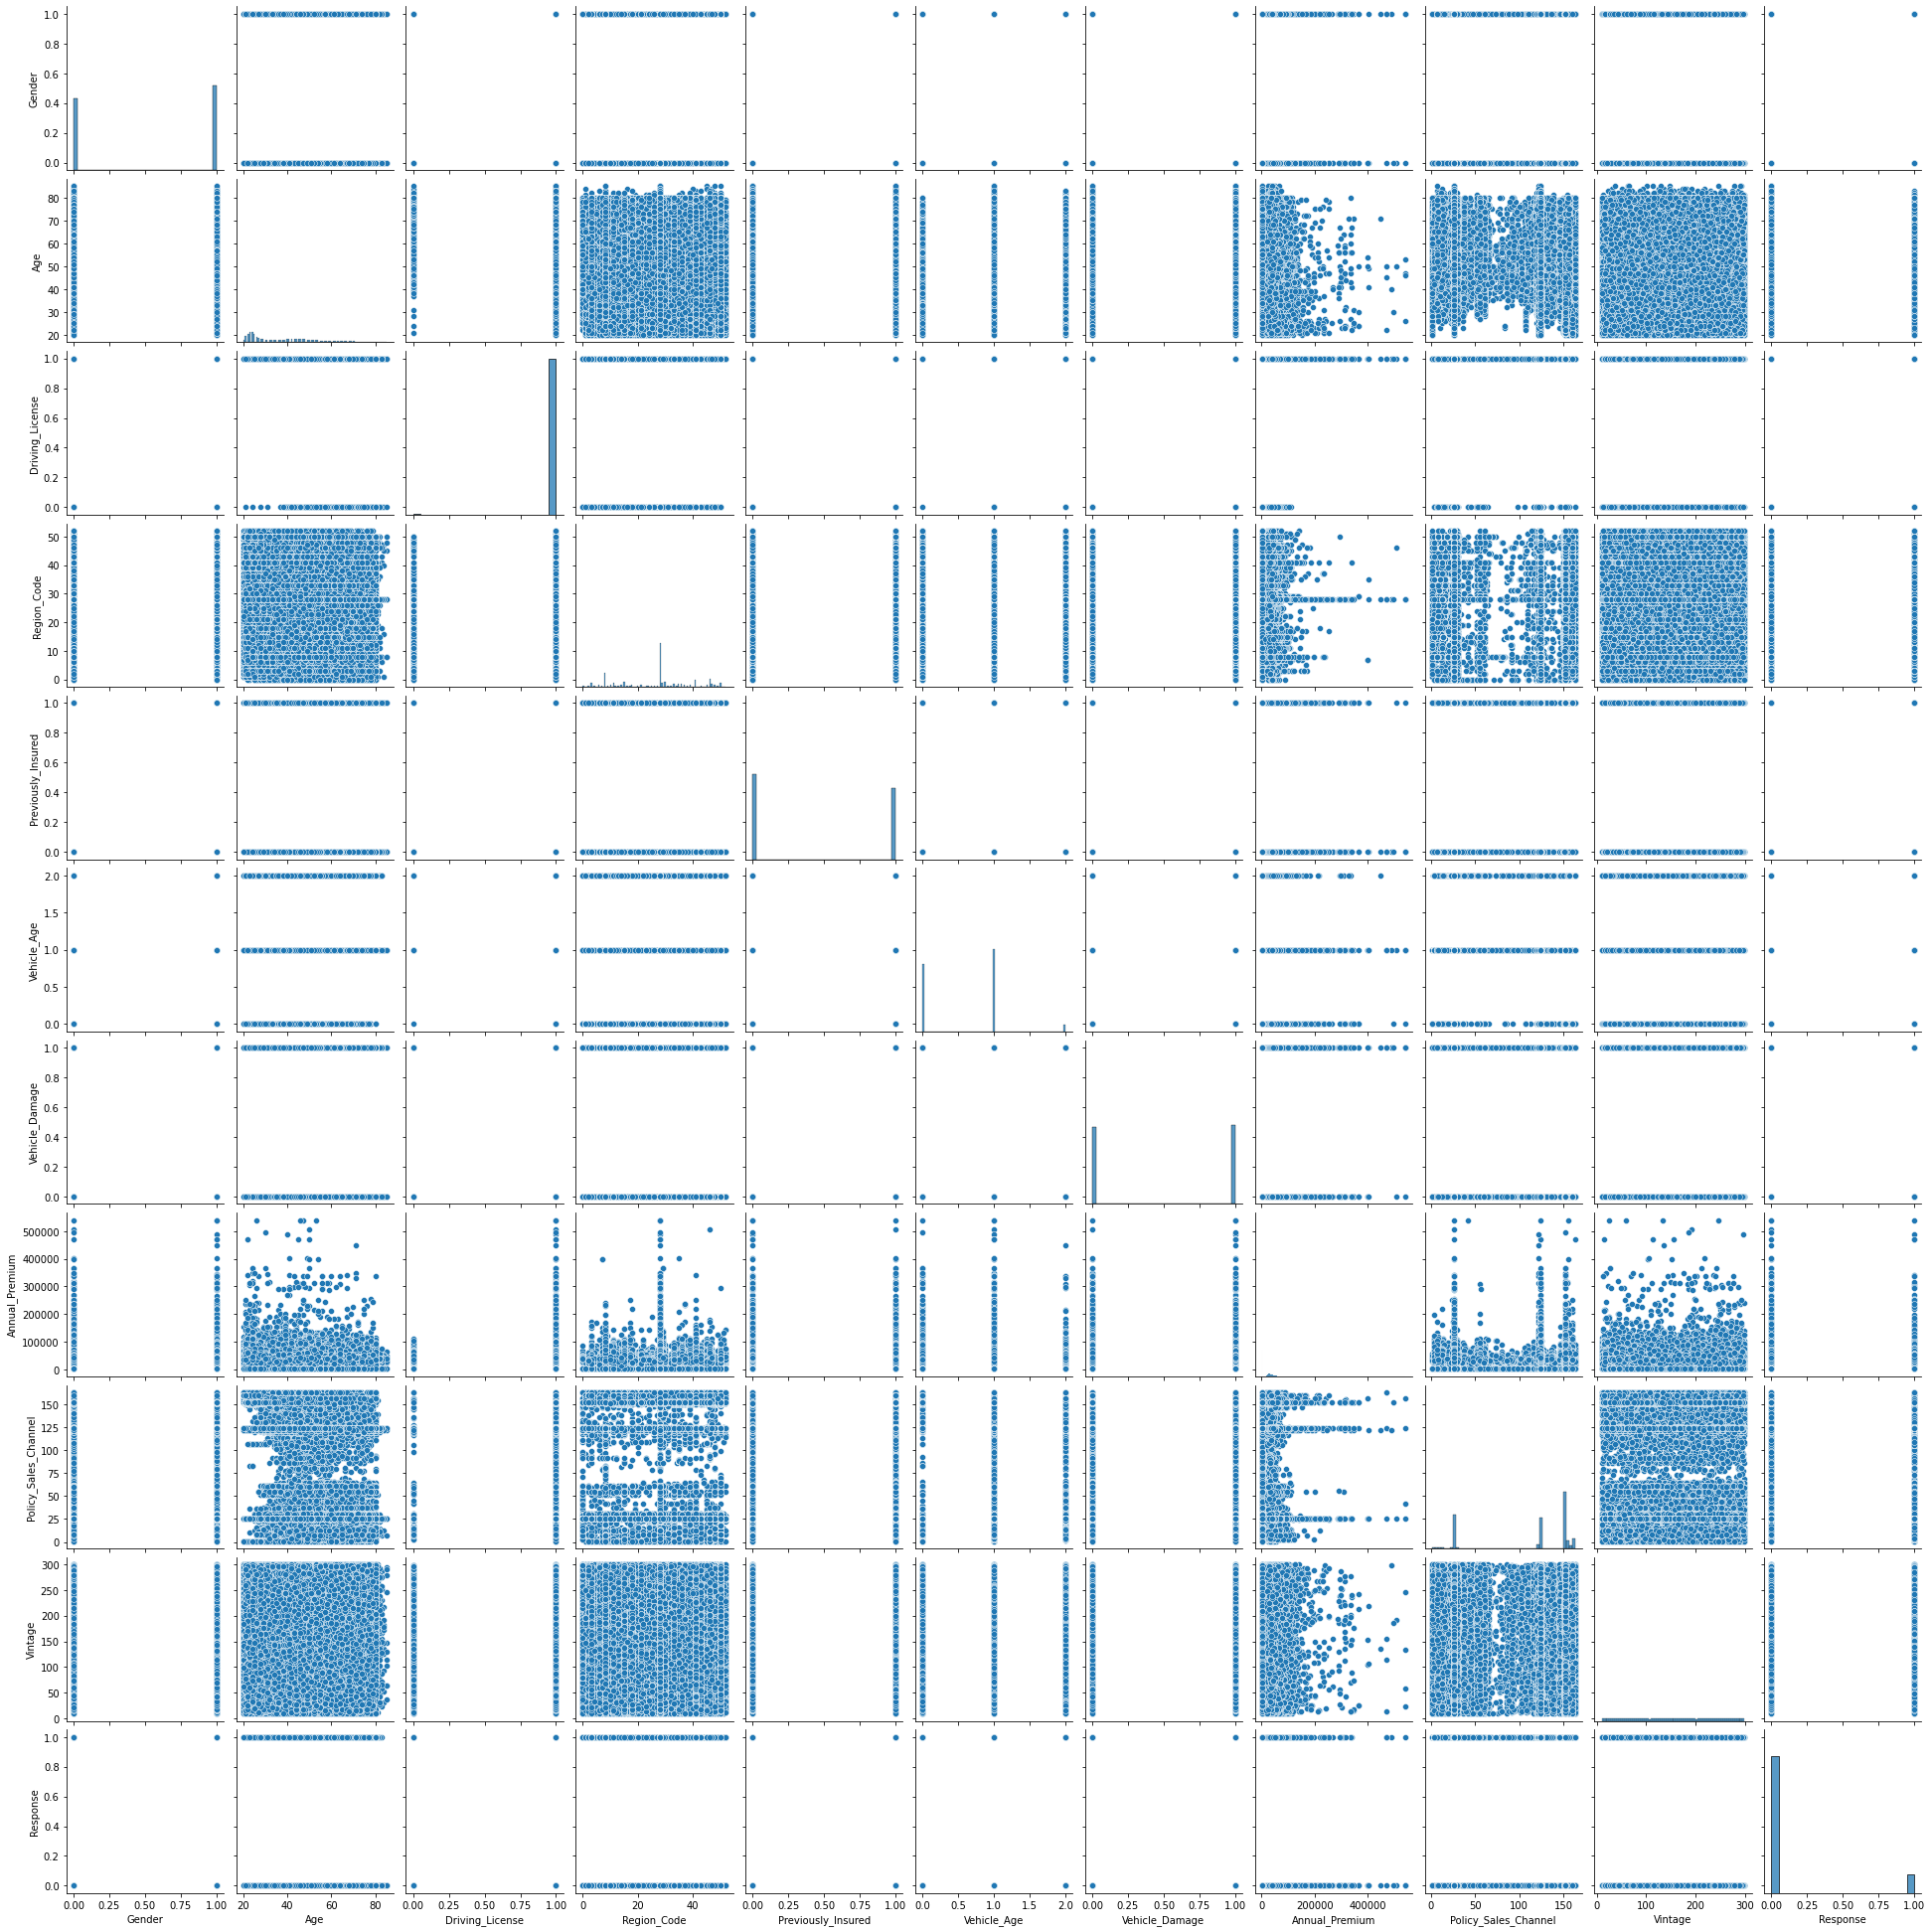

In [20]:
sns.pairplot(df_train.drop("id",axis=1))

# 컬럼별 분석
## id
***'id'***,'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

In [24]:
df_train['id'].value_counts()

2047      1
295621    1
84604     1
82557     1
88702     1
         ..
107934    1
109983    1
21920     1
23969     1
2049      1
Name: id, Length: 381109, dtype: int64

id 컬럼은 고유한값으로 파악되어 input data에서 제외한다.

## Gender
~~~'id'~~~,'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

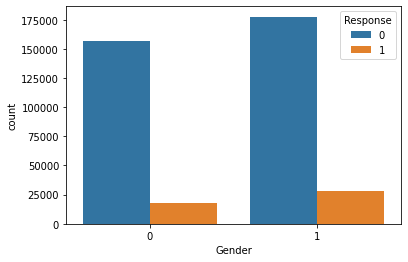

In [27]:
sns.countplot(data = df_train, x = 'Gender', hue = 'Response')

Gender에 따른 Response비율이 유사하여, Gender 컬럼은 input에서 제외

## Age
~~~'id','Gender'~~~, 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


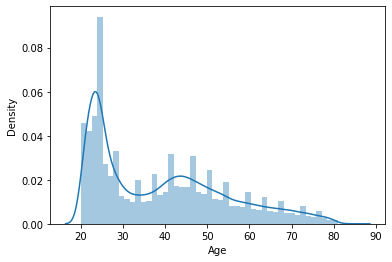

In [32]:
sns.distplot(df_train['Age'])

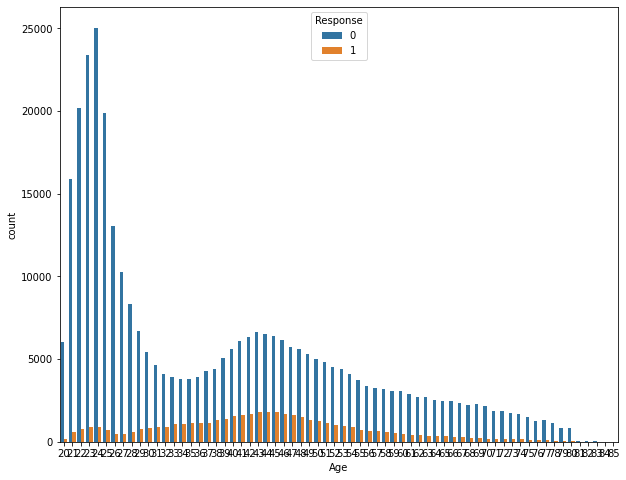

In [36]:
plt.figure(figsize=(10, 8))
# plt.scatter(df_train['Age'],df_train['Response'])
sns.countplot(data = df_train, x = 'Age', hue = 'Response')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


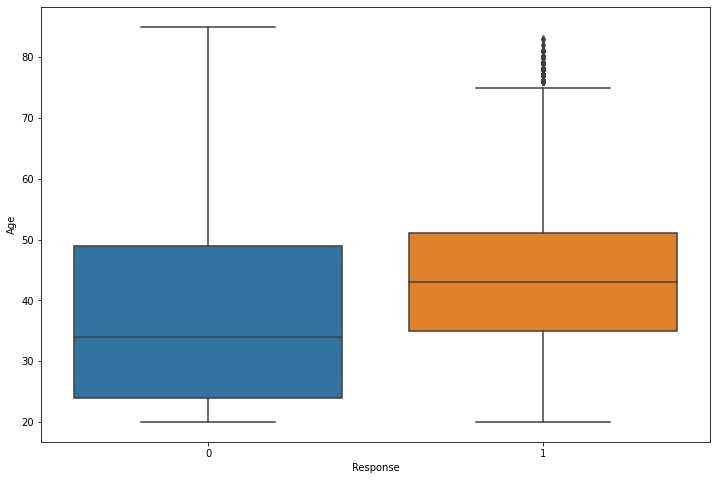

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(df_train['Response'], df_train['Age'], ax=ax)

나이에 따른 Response 0, 1의 비율이 다른걸 볼 수 있다.

## Driving_License
~~~'id','Gender'~~~, 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

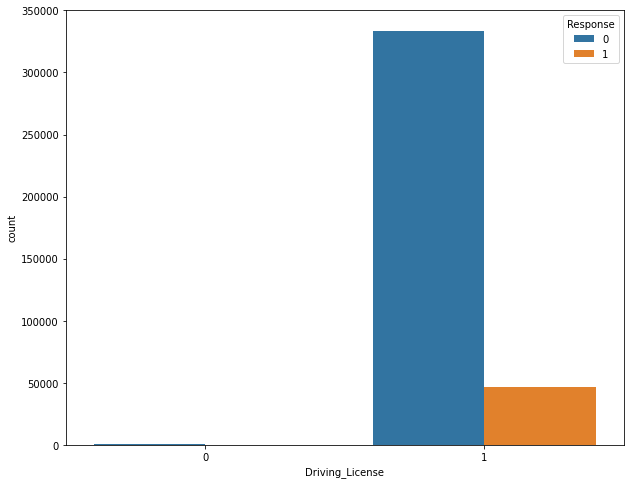

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df_train, x = 'Driving_License', hue = 'Response')
# plt.scatter(df_train['Driving_License'],df_train['Response'])

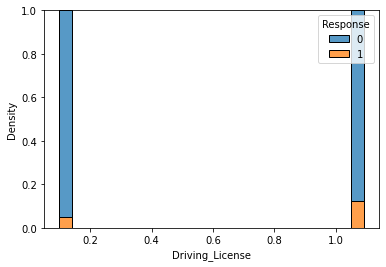

In [55]:
sns.histplot(df_train, x="Driving_License", hue="Response", stat="density", multiple="fill", shrink=.8)

응답 비율은 약간이 차이가 있지만, 데이터의 편향을 무시할 정도로 큰 차이가 없다고 판단된다. 히트맵에서 상관도도 제일 낮게 나온것에 따라 drop 하는것이 낫다고 판단됨

## Region_Code
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

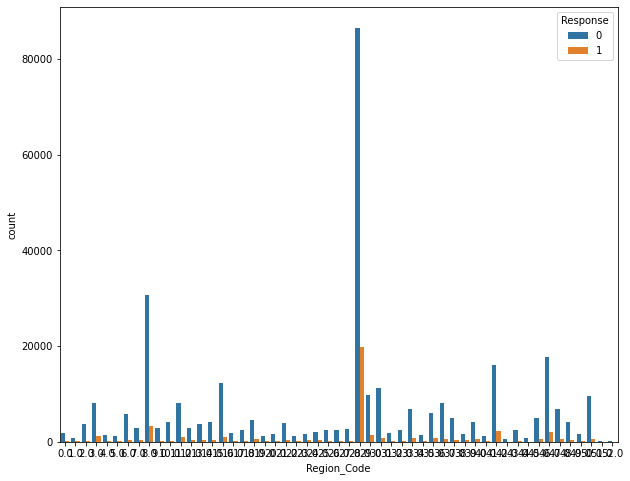

In [60]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df_train, x = 'Region_Code', hue = 'Response')

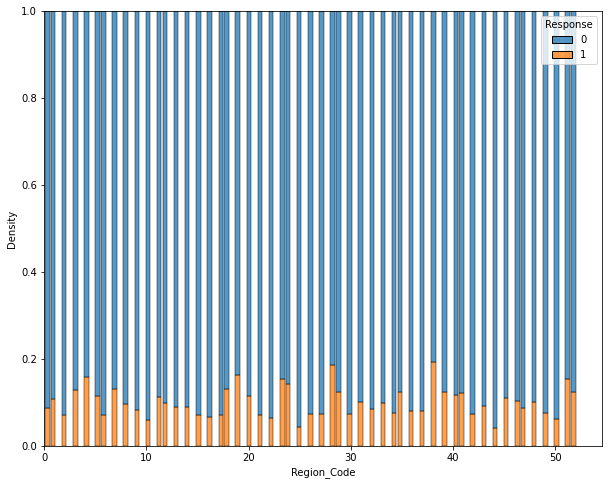

In [61]:
plt.figure(figsize=(10, 8))
sns.histplot(df_train, x="Region_Code", hue="Response", stat="density", multiple="fill", shrink=.8)

Region_Code 별로 응답비율이 2배 이상 차이나는 부분을 확인할 수 있다. 학습에 유의미한 결과로 판단

## Previously_Insured
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

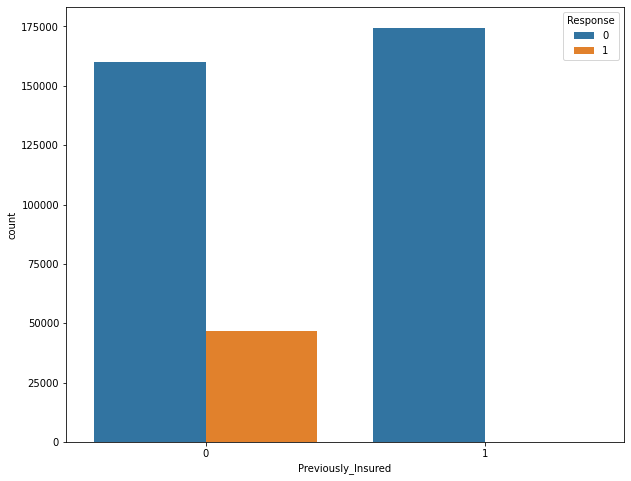

In [62]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df_train, x = 'Previously_Insured', hue = 'Response')

Previousely_Insured에서 결정적으로 응답비율의 차이가 확인된다. 히트맵에서도 상관관계가 가장 큰것으로 확인했었다.

## Vehicle_Age
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

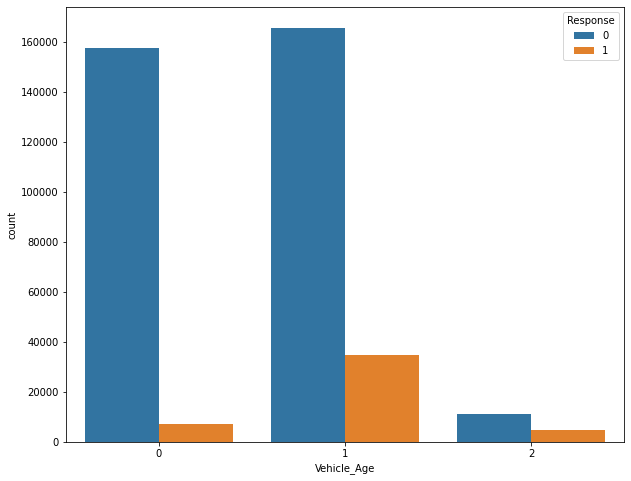

In [63]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df_train, x = 'Vehicle_Age', hue = 'Response')

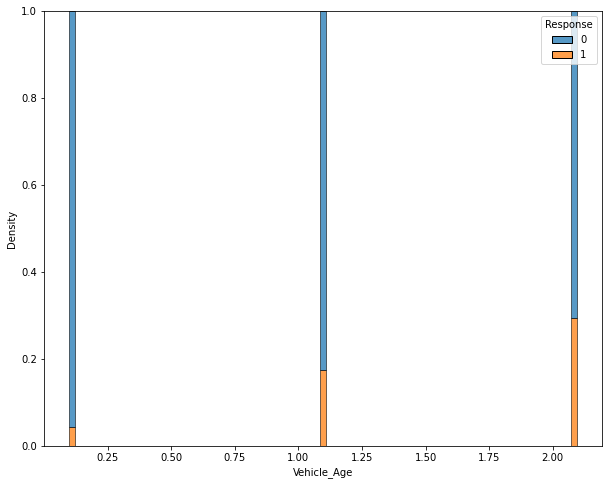

In [64]:
plt.figure(figsize=(10, 8))
sns.histplot(df_train, x="Vehicle_Age", hue="Response", stat="density", multiple="fill", shrink=.8)

Vehicle_Age 에 따라 응답비율이 점차 증가하는걸 확인할 수 있다.

## Vehicle_Damage
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'

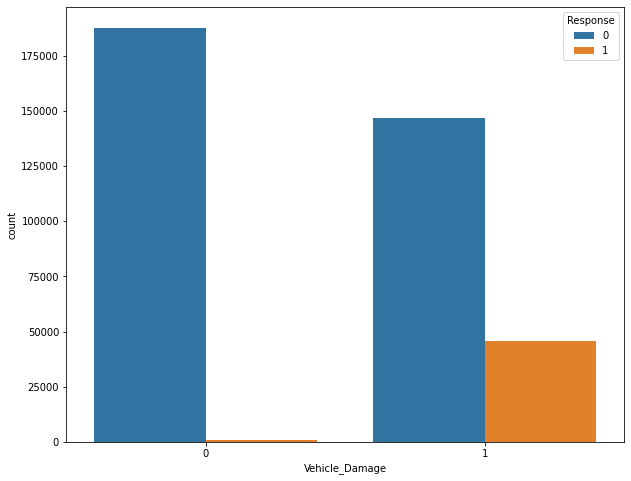

In [65]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df_train, x = 'Vehicle_Damage', hue = 'Response')

Vehicle_Damage 역시 현저한 응답비율의 차이를 확인할 수 있다. 고장이 났으니.. 보험을 들고 싶은것으로 해석할 수 있다

## Annual_Premium
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', ~~~'Annual_Premium'~~~, 'Policy_Sales_Channel', 'Vintage', 'Response'

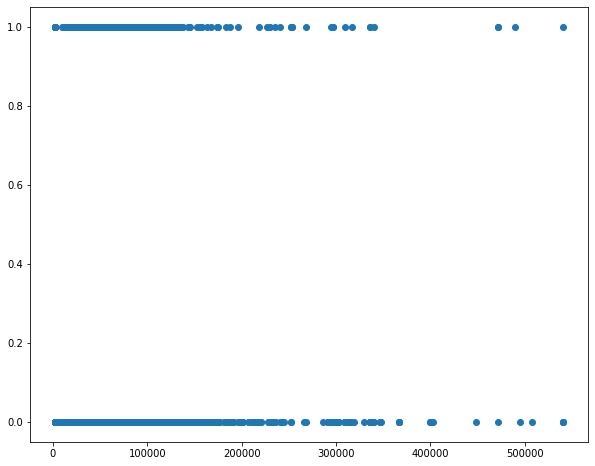

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(df_train['Annual_Premium'],df_train['Response'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


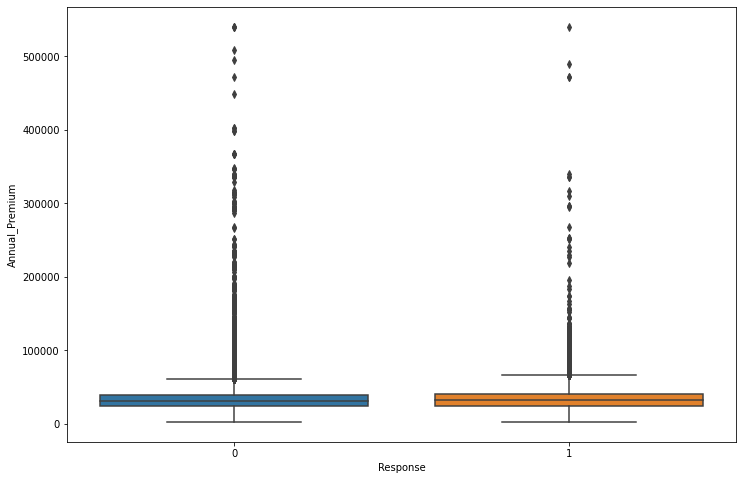

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(df_train['Response'], df_train['Annual_Premium'], ax=ax)

연간 보험료에 따른 응답은 서로 동일한 수치를 보이기 때문에 input데이터에서 제외

## Policy_Sales_Channel
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', ~~~'Annual_Premium', 'Policy_Sales_Channel'~~~, 'Vintage', 'Response'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


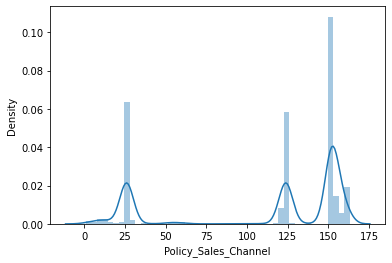

In [74]:
sns.distplot(df_train['Policy_Sales_Channel'])

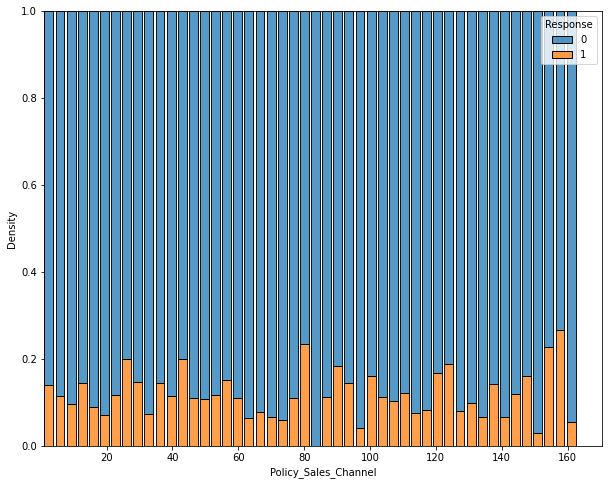

In [72]:
plt.figure(figsize=(10, 8))
sns.histplot(df_train, x="Policy_Sales_Channel", hue="Response", stat="density", multiple="fill", shrink=.8)

채널별로 비율만으로 보면 응답률의 차이가 상당하지만, 
채널별 데이터의 분포가 너무 편향되어있다.

## Vintage
~~~'id','Gender'~~~, 'Age', ~~~'Driving_License'~~~, 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', ~~~'Annual_Premium', 'Policy_Sales_Channel'~~~, 'Vintage', 'Response'

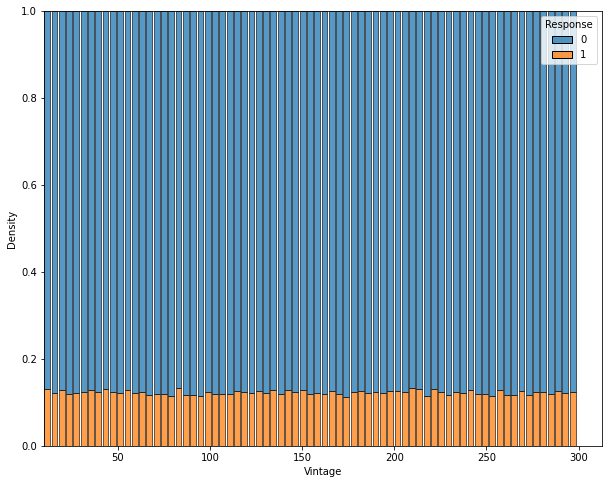

In [76]:
plt.figure(figsize=(10, 8))
sns.histplot(df_train, x="Vintage", hue="Response", stat="density", multiple="fill", shrink=.8)

모든 Vintag에 대해 응답률이 유사하다. 연관성 없음.